# Importing Libraries 📚

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from twilio.rest import Client

## Importing Data 

In [18]:
df = pd.read_csv("Expenses_Feb-25-Apr-25.csv")

In [15]:
df.head() #show first five rows of the data

,TIME,TYPE,AMOUNT,CATEGORY,ACCOUNT,NOTES
0,"Feb 07, 2025 2:14 PM",(-) Expense,50.0,Social,Cash,
1,"Feb 07, 2025 2:14 PM",(-) Expense,490.0,Car,Cash,
2,"Feb 09, 2025 2:14 PM",(-) Expense,96.0,Food,Cash,
3,"Feb 09, 2025 2:14 PM",(-) Expense,60.0,Food,Cash,
4,"Feb 10, 2025 2:13 PM",(-) Expense,14.0,Transportation,Cash,


In [19]:
df.describe() 

,AMOUNT
count,207.00000
mean,717.79343
std,2524.74194
min,3.26000
25%,18.00000
50%,45.00000
75%,200.00000
max,24320.00000


In [25]:
df.isnull().sum() #No null values

TIME        0
TYPE        0
AMOUNT      0
CATEGORY    0
ACCOUNT     0
NOTES       0
dtype: int64

## Clean Data : Standardize date ⌚

In [41]:
df['TIME'] = pd.to_datetime(df['TIME'], format='%b %d, %Y %I:%M %p') #Convert time into proper date and time


In [67]:
df = df.rename(columns={'TIME' : 'DATE_TIME'}) #Renaming the Column

In [69]:
df['AMOUNT'] = df['AMOUNT'].abs() #Ensure all date are in positive


## Analysis & Visualization 📊

In [24]:
total_spent = df[df['TYPE'] == '(-) Expense']['AMOUNT'].sum() #Total Amount Spend 78983.41
total_spent

78983.41

C:\Users\user\AppData\Local\Temp\ipykernel_13604\4031414873.py:7: UserWarning: Glyph 128690 (\N{BICYCLE}) missing from current font.
  plt.savefig('spending_by_category.png', dpi=300)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128690 (\N{BICYCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


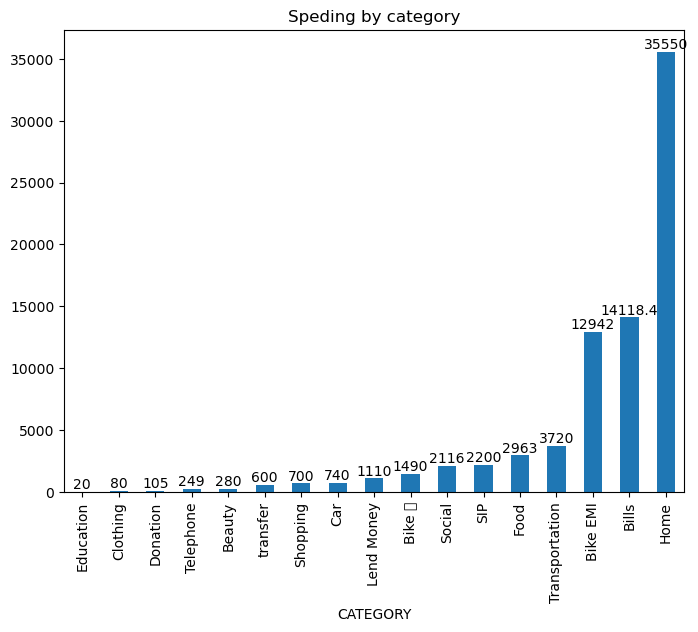

In [234]:
category_spending = df[df['TYPE'] == '(-) Expense'].groupby('CATEGORY')['AMOUNT'].sum().sort_values(ascending=True)
category_spending
ax = category_spending.plot(kind='bar', figsize = (8, 6))
ax.bar_label(ax.containers[0])
plt.title("Speding by category")

plt.savefig('spending_by_category.png', dpi=300)


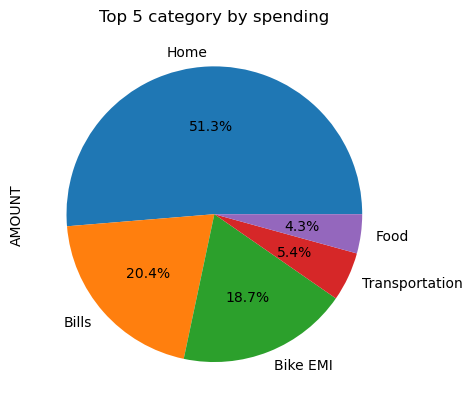

In [236]:
#Pie Chart
top_n = 5
top_category_spending = category_spending.nlargest(top_n)
top_category_spending.plot(kind='pie', autopct = '%1.1f%%')
plt.title("Top 5 category by spending")
plt.show
plt.savefig("Top_5_category_by_spending.png", dpi = 300)
plt.close

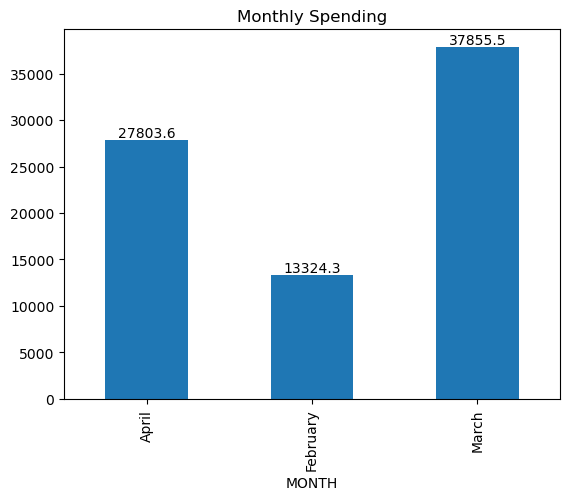

In [256]:
df['MONTH'] = df['DATE_TIME'].dt.month_name()
monthly_spending = df[df['TYPE'] == '(-) Expense'].groupby('MONTH')['AMOUNT'].sum()

ax = monthly_spending.plot(kind = 'bar')
ax.bar_label(ax.containers[0])
             
plt.title('Monthly Spending')
plt.savefig('Monthly_Spending.png', dpi=300)
plt.show()

## Simple Anomaly Detection (No ML)

In [260]:
# Flag transactions 2x the average spending in a category
df['Is_Outlier'] = df[df['TYPE'] == '(-) Expense'].groupby('CATEGORY')['AMOUNT'].transform(
    lambda x: x > 2 * x.mean()
)
outliers = df[df['Is_Outlier'] == True]
print(outliers)

              DATE_TIME         TYPE   AMOUNT        CATEGORY  ACCOUNT  \
10  2025-02-16 00:11:00  (-) Expense   742.00          Social     Cash   
14  2025-02-17 10:19:00  (-) Expense  1000.00  Transportation  Savings   
56  2025-03-02 19:50:00  (-) Expense  1000.00      Lend Money  Savings   
113 2025-03-22 18:49:00  (-) Expense  4359.72           Bills  Savings   
147 2025-03-31 11:42:00  (-) Expense   502.00            Food  Savings   
149 2025-03-31 11:42:00  (-) Expense   950.00          Bike 🚲  Savings   
161 2025-04-05 15:15:00  (-) Expense   215.00            Food  Savings   
190 2025-04-20 18:08:00  (-) Expense   239.00            Food  Savings   
193 2025-04-21 14:04:00  (-) Expense  4796.63           Bills  Savings   
194 2025-04-21 18:25:00  (-) Expense   350.00  Transportation  Savings   
201 2025-04-23 23:55:00  (-) Expense   140.00  Transportation  Savings   

                               NOTES      MONTH Is_Outlier  
10              Sunirmal Da weeding    February   

## SMS Alerts (API)

In [41]:
from twilio.rest import Client

# Twilio credentials
account_sid = 'ACd5501a495094897422a2fc4ca6eb26'
auth_token = '63039e55d72b517da607c76bf5e95e'
client = Client('ACd5501a495094897422a2fca6eb2606', '039e55d72b517da607c76bf5e9548e')

# Send SMS
message = client.messages.create(
    body=f"Budget Alert: You spent {total_spent:.2f}Rupees this month!",
    from_='+16073256725',  # Your Twilio number
    to='your number'  # Your real number
)
print("SMS sent!")

SMS sent!
